In [14]:
import pandas as pd
import numpy as np

from plotnine import *

In [15]:
import warnings
warnings.filterwarnings('ignore')

In [16]:
df = pd.read_csv('data/pokemon.csv')
df.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0


In [17]:
pokemons = df[['name', 'defense', 'attack', 'hp', 
    'sp_attack', 'sp_defense', 'speed', 'type1', 'type2', 'generation', 'is_legendary']]

In [18]:
pokemons.set_index('name', inplace = True)

In [19]:
pokemons = pokemons[pokemons.type1.isin(['water', 'normal', 'grass', 'bug', 'psychic'])]

In [20]:
pokemons.type1.value_counts()

water      114
normal     105
grass       78
bug         72
psychic     53
Name: type1, dtype: int64

In [21]:
df.is_legendary = df.is_legendary.astype(bool)

In [22]:
df[['defense', 'attack', 'speed', 'type1', 'type2', 'is_legendary']].head(10)

,defense,attack,speed,type1,type2,is_legendary
0,49,49,45,grass,poison,False
1,63,62,60,grass,poison,False
2,123,100,80,grass,poison,False
3,43,52,65,fire,NaN,False
4,58,64,80,fire,NaN,False
5,78,104,100,fire,flying,False
6,65,48,43,water,NaN,False
7,80,63,58,water,NaN,False
8,120,103,78,water,NaN,False
9,35,30,45,bug,NaN,False


In [ ]:
from plotnine import *

ggplot(data = df) +\
    geom_bar(aes(x = 'type1'))






In [62]:
a = ggplot(data = df) +\
    geom_bar(aes(x = 'type1'))

ggplot.save(a, 'figures/plotnine1_base_bar.png')

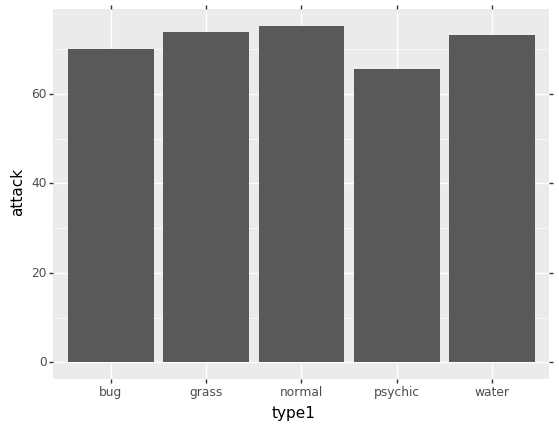

<ggplot: (-9223372029298999450)>

In [24]:
ggplot(data = pokemons) +\
    geom_col(aes(x = 'type1', 
                 y = 'attack', 
                 fill = 'is_legendary'), 
             stat = 'summary', 
             position = 'dodge') 

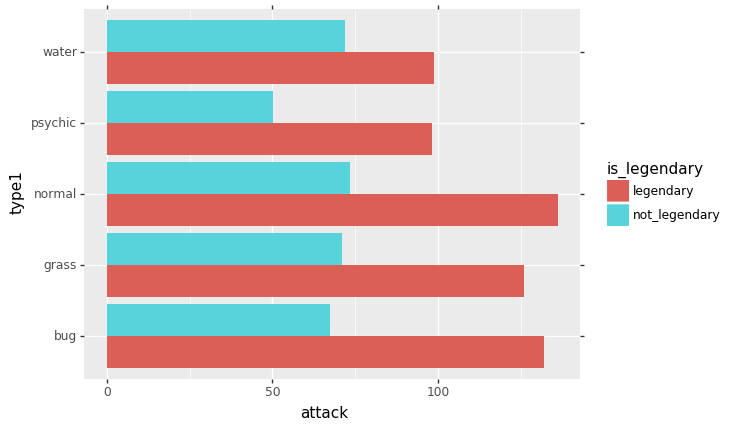

<ggplot: (-9223372029294863416)>

In [103]:
ggplot(data = df) +\
    geom_col(aes(x = 'type1', 
                 y = 'attack', 
                 fill = 'is_legendary'),
            stat = 'summary', 
            position = 'dodge') +\
    coord_flip()

In [83]:
a = ggplot(data = df) +\
    geom_col(aes(x = 'type1', 
                 y = 'attack', 
                 fill = 'is_legendary'), 
             stat = 'summary', 
             position = 'dodge') 

ggplot.save(a, 'figures/plotnine1_dodged_bar.png')

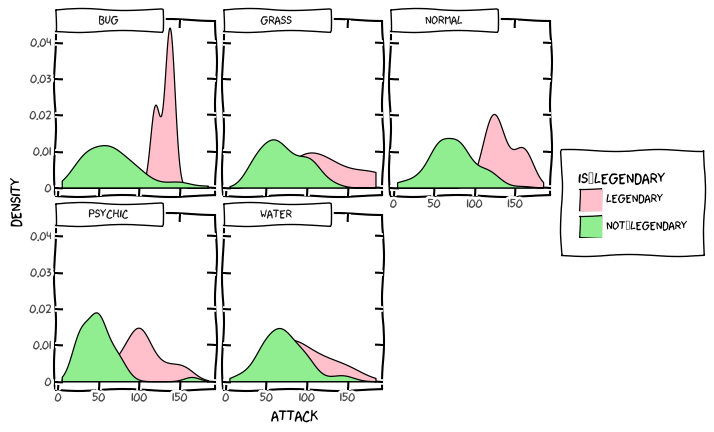

<ggplot: (7552570288)>

In [106]:
ggplot(data = df) +\
    geom_density(aes(x = 'attack', 
                     fill = 'is_legendary')) +\
    facet_wrap('~ type1', scales = 'fixed') +\
    scale_fill_manual(['pink', 'lightgreen']) +\
    theme_xkcd()

In [1]:
import plotly_express as px
gapminder = px.data.gapminder()
gapminder = gapminder.query("year == 2007")

In [2]:
gapminder.head()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
11,Afghanistan,Asia,2007,43.828,31889923,974.580338,AFG,4
23,Albania,Europe,2007,76.423,3600523,5937.029526,ALB,8
35,Algeria,Africa,2007,72.301,33333216,6223.367465,DZA,12
47,Angola,Africa,2007,42.731,12420476,4797.231267,AGO,24
59,Argentina,Americas,2007,75.320,40301927,12779.379640,ARG,32


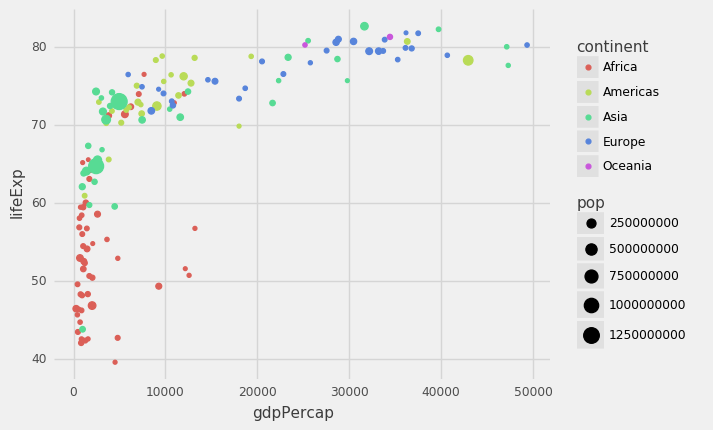

<ggplot: (7555751821)>

In [11]:
ggplot(gapminder) + geom_point(aes(x = 'gdpPercap', y = 'lifeExp', color = 'continent', size = 'pop')) +\
    theme_538()

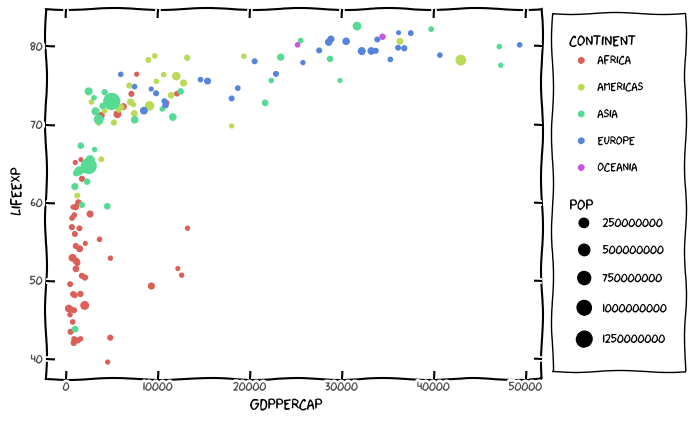

<ggplot: (-9223372029299050815)>

In [12]:
ggplot(gapminder) + geom_point(aes(x = 'gdpPercap', y = 'lifeExp', color = 'continent', size = 'pop')) +\
    theme_xkcd()

In [13]:
gapminder.to_csv('data/gapminder.csv')